<a href="https://colab.research.google.com/github/gaurisharma360/intensityofepilepsy/blob/main/Intensity_of_Epilepsy_using_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
data_df=pd.read_csv("/content/Minorv2.csv")

In [5]:
data_df.head()

,"Treatment (0=Placebo, 1=Progabide)",Age,Difference in frequencies,Intensity of disease
0,0,31,0.375,4
1,0,30,0.375,4
2,0,25,0.625,4
3,0,36,0.625,4
4,0,22,-1.375,2


In [6]:

x=data_df.drop([('Intensity of disease')],axis=1).values
y=data_df['Intensity of disease'].values

In [7]:
print(x)

[[ 0.    31.     0.375]
 [ 0.    30.     0.375]
 [ 0.    25.     0.625]
 [ 0.    36.     0.625]
 [ 0.    22.    -1.375]
 [ 0.    29.    -0.625]
 [ 0.    31.     0.   ]
 [ 0.    36.     5.375]
 [ 0.    37.    -0.125]
 [ 0.    28.     2.875]
 [ 0.    36.     1.75 ]
 [ 0.    24.    -0.25 ]
 [ 0.    28.    -0.25 ]
 [ 0.    36.     0.   ]
 [ 0.    26.    -3.5  ]
 [ 0.    26.    -4.25 ]
 [ 0.    28.    -1.5  ]
 [ 0.    31.     1.5  ]
 [ 0.    32.    -0.375]
 [ 0.    21.    -0.5  ]
 [ 0.    29.     0.25 ]
 [ 0.    21.     0.625]
 [ 0.    32.    -0.5  ]
 [ 0.    25.     0.25 ]
 [ 0.    30.    11.   ]
 [ 0.    40.    -0.375]
 [ 0.    19.     0.   ]
 [ 0.    22.     0.75 ]
 [ 1.    18.    -4.25 ]
 [ 1.    32.    -1.25 ]
 [ 1.    20.    -1.5  ]
 [ 1.    20.     0.375]
 [ 1.    18.     0.   ]
 [ 1.    24.    -1.625]
 [ 1.    30.     5.375]
 [ 1.    35.     0.75 ]
 [ 1.    57.    -0.125]
 [ 1.    20.    -5.375]
 [ 1.    22.    -1.5  ]
 [ 1.    28.    -0.375]
 [ 1.    23.    -2.   ]
 [ 1.    40.    

In [8]:
print(y)

[4 4 4 4 2 3 4 6 3 5 5 3 3 4 1 1 2 5 3 3 4 4 3 4 7 3 4 4 6 2 2 4 4 2 6 3 3
 1 2 3 2 3 5 2 4 4 3 3 7 2 2 2 4 2 3 6 2 2 3]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=ml.predict(x_test)
print(y_pred)

[3.61986518 3.31751628 4.76316622 3.52124139 3.1899499  2.78518894
 2.69805273 3.42005115 2.85558187]


In [12]:
ml.predict([[0,31,0.375]])

array([3.61986518])

In [13]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred, squared=False)
errors

0.6634561589850955

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6758718175771294

Text(0.5, 1.0, 'Actual vs Predicted')

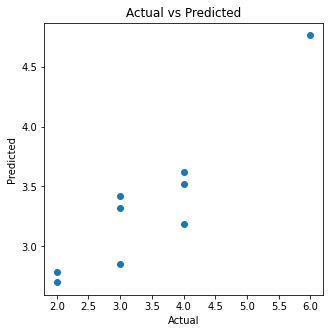

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

**Multinomial Logistic Regression**

In [16]:
x_train

array([[ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375],
       [ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1

In [17]:
y_train

array([3, 2, 4, 3, 4, 3, 5, 4, 2, 3, 3, 2, 2, 4, 6, 1, 5, 4, 4, 2, 7, 2,
       2, 3, 3, 4, 4, 2, 1, 2, 2, 4, 4, 4, 3, 3, 3, 4, 7, 5, 3, 3, 3, 4,
       6, 5, 1, 6, 2, 2])

In [18]:
x_test

array([[ 0.   , 31.   ,  0.375],
       [ 0.   , 29.   , -0.625],
       [ 1.   , 30.   ,  5.375],
       [ 0.   , 36.   ,  0.   ],
       [ 1.   , 25.   ,  0.125],
       [ 1.   , 41.   , -1.375],
       [ 1.   , 36.   , -1.625],
       [ 0.   , 40.   , -0.375],
       [ 1.   , 25.   , -1.   ]])

In [19]:
y_test

array([4, 3, 6, 4, 4, 2, 2, 3, 3])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [21]:
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs",random_state=42)

In [22]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=42)

In [23]:
y_predlr=lr.predict(x_test)

In [24]:
lr.score(x_test,y_test)

0.5555555555555556

In [25]:
#applying standardisation
#scaler=StandardScaler()

In [26]:
#x_train_s=scaler.fit_transform(x_train)
#x_test_s=scaler.transform(x_test)

In [27]:
#lr.fit(x_train,y_train)

In [28]:
#y_predlr2=lr.predict(x_test_s)

In [29]:
#lr.score(x_test_s,y_test)

**Naive Bayes**

In [30]:
x_train

array([[ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375],
       [ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1

In [31]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()

In [32]:
modelnb.fit(x_train,y_train)

GaussianNB()

In [33]:
modelnb.score(x_test,y_test)

0.7777777777777778

In [34]:
x_test

array([[ 0.   , 31.   ,  0.375],
       [ 0.   , 29.   , -0.625],
       [ 1.   , 30.   ,  5.375],
       [ 0.   , 36.   ,  0.   ],
       [ 1.   , 25.   ,  0.125],
       [ 1.   , 41.   , -1.375],
       [ 1.   , 36.   , -1.625],
       [ 0.   , 40.   , -0.375],
       [ 1.   , 25.   , -1.   ]])

In [35]:
y_test

array([4, 3, 6, 4, 4, 2, 2, 3, 3])

In [36]:
modelnb.predict(x_test)

array([4, 3, 6, 3, 4, 2, 2, 3, 2])

**K-Nearest Neighbours(KNN algorithm)**

In [37]:
#Scaling imp here else 0.33
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_trainsc=scaler.transform(x_train)
x_testsc=scaler.transform(x_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_trainsc,y_train)

KNeighborsClassifier()

In [39]:
classifier.score(x_testsc,y_test)

0.3333333333333333

In [40]:
y_pred=classifier.predict(x_testsc)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.33      0.50      0.40         2
           3       0.25      0.33      0.29         3
           4       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         1

    accuracy                           0.33         9
   macro avg       0.27      0.29      0.27         9
weighted avg       0.32      0.33      0.32         9

[[1 1 0 0]
 [1 1 1 0]
 [1 1 1 0]
 [0 1 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree**

In [42]:
x_train

array([[ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375],
       [ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1

In [43]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
#importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
#creating decision tree function
dt=DecisionTreeClassifier(random_state=42)

In [46]:
#fitting model
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
#checking training score
dt.score(x_train,y_train)

1.0

In [48]:
#checking testing score
y_preddt=dt.predict(x_test)

In [49]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_preddt)

0.8888888888888888

In [50]:
print(classification_report(y_test,y_preddt))

              precision    recall  f1-score   support

           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.89         9
   macro avg       0.92      0.92      0.90         9
weighted avg       0.93      0.89      0.89         9



**Random Forest**

In [51]:
x_train

array([[ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375],
       [ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
rf.predict(x_test)

array([4, 3, 6, 4, 4, 2, 2, 3, 2])

In [54]:
y_predrf=rf.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_predrf)


0.8888888888888888

In [56]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.89         9
   macro avg       0.92      0.92      0.90         9
weighted avg       0.93      0.89      0.89         9



SGD

In [70]:
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
#scaled
scaler = preprocessing.StandardScaler()
sgdx_train = scaler.fit_transform(x_train)
sgdx_test = scaler.transform(x_test)

In [79]:
sgdc=SGDClassifier(max_iter=1000)
print(sgdc)

SGDClassifier()


In [80]:
sgdc.fit(sgdx_train,y_train)

SGDClassifier()

In [81]:
score = sgdc.score(sgdx_train, y_train)
print("Training score: ", score) 
 



Training score:  0.36


In [82]:
sgdypred = sgdc.predict(sgdx_test)

In [83]:
cr = classification_report(y_test, sgdypred)
print(cr)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.38      1.00      0.55         3
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0

    accuracy                           0.33         9
   macro avg       0.07      0.20      0.11         9
weighted avg       0.12      0.33      0.18         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1